<a href="https://colab.research.google.com/github/Shakorly/eCommerce_sentiment_analysis/blob/main/E_commerce_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Step 1:

  >> Understand the Dataset

  Before diving into the analysis, let's understand the dataset:

  Columns:

  Class Name: The target variable with 4 categories -
   "Electronics",
   "Household",
   "Books",
  "Clothing & Accessories".

  Data Point: The product and its description from an e-commerce website.

  Size: 50,425 instances.

  Task: Text classification into 4 classes.

In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


> ## Loading the dataset

In [ ]:
# Load the dataset
data = pd.read_csv("/content/ecommerceDataset.csv", header = None)
print(data.head())

           0                                                  1
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...


## Step 3: Exploratory Data Analysis (EDA)


In [ ]:
data.columns = ['Category', 'Description']
data.head()

,Category,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [ ]:
# How many categories will are dealing with
data["Category"].value_counts()

,count
Category,
Household,19313
Books,11820
Electronics,10621
Clothing & Accessories,8671


In [ ]:
 # Display basic info
 print(data.info())
 print("================================")
 print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     50425 non-null  object
 1   Description  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB
None
Category       0
Description    1
dtype: int64


In [ ]:
# drop the missing values
data = data.dropna(subset=['Description'])

In [ ]:
def clean_text(text):
  text = text.lower()
  text = text.strip()
  text = text.replace('\n', ' ')
  text = re.sub('[^a-z0-9]', ' ', text)
  text = re.sub(r'\s+', ' ', text)
  return text

In [ ]:
# Apply cleaning to descriptions
data['clean_description'] = data["Description"].apply(clean_text)

In [ ]:
# checking the data again
data.head()

,Category,Description,clean_description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,paper plane design framed wall hanging motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",saf floral framed painting wood 30 inch x 10 i...
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,saf uv textured modern art print framed painti...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",saf flower print framed painting synthetic 13 ...
4,Household,Incredible Gifts India Wooden Happy Birthday U...,incredible gifts india wooden happy birthday u...


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# function for advance text preprocessing
def preprocess_text(text):
  if not isinstance(text, str):
    return ""

  # Tokenize
  tokens = nltk.word_tokenize(text.lower())

  # Remove stopwords
  stop_words = set(stopwords.words("english"))
  tokens = [word for word in tokens if word not in stop_words]

  return " ".join(tokens)

data['processed_text'] = data['clean_description'].apply(preprocess_text)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['processed_text'])

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"\nNumber of features: {len(feature_names)}")
print(f"Sample features: {feature_names[:10]}")

# Split the data
X = X_tfidf
y = data['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Number of features: 5000
Sample features: ['00' '000' '001' '01' '0mm' '10' '100' '1000' '1000w' '101']

Training set shape: (40339, 5000)
Testing set shape: (10085, 5000)



Multinomial Naive Bayes Results:
Accuracy: 0.9378
Training time: 0.22 seconds

Classification Report:
                        precision    recall  f1-score   support

                 Books       0.97      0.90      0.93      2364
Clothing & Accessories       0.94      0.97      0.96      1734
           Electronics       0.94      0.91      0.93      2124
             Household       0.92      0.96      0.94      3863

              accuracy                           0.94     10085
             macro avg       0.94      0.94      0.94     10085
          weighted avg       0.94      0.94      0.94     10085



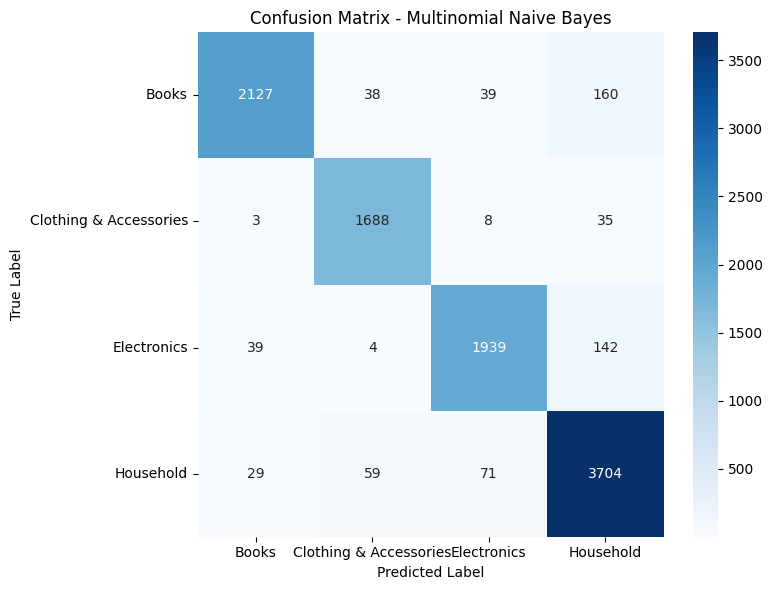


Logistic Regression Results:
Accuracy: 0.9633
Training time: 10.76 seconds

Classification Report:
                        precision    recall  f1-score   support

                 Books       0.97      0.95      0.96      2364
Clothing & Accessories       0.97      0.98      0.97      1734
           Electronics       0.97      0.94      0.96      2124
             Household       0.95      0.98      0.97      3863

              accuracy                           0.96     10085
             macro avg       0.97      0.96      0.96     10085
          weighted avg       0.96      0.96      0.96     10085



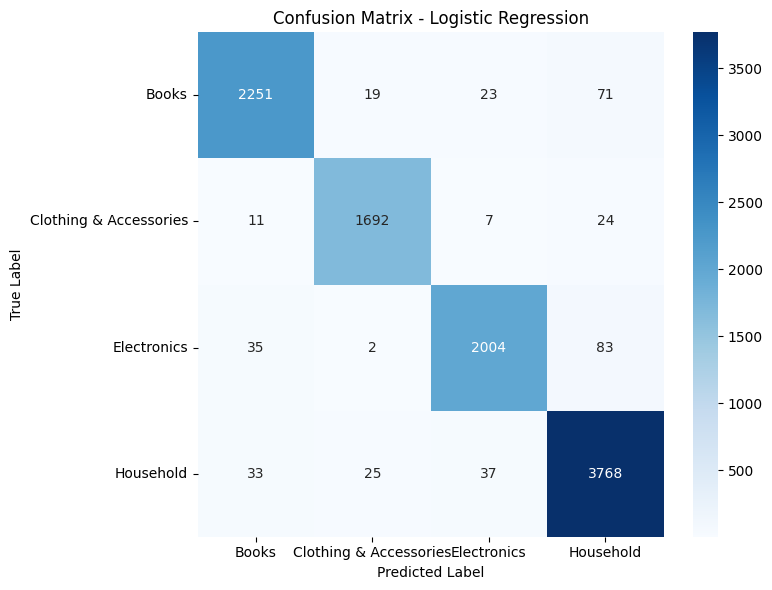


Linear SVM Results:
Accuracy: 0.9720
Training time: 2.75 seconds

Classification Report:
                        precision    recall  f1-score   support

                 Books       0.97      0.96      0.97      2364
Clothing & Accessories       0.98      0.98      0.98      1734
           Electronics       0.97      0.96      0.97      2124
             Household       0.97      0.98      0.97      3863

              accuracy                           0.97     10085
             macro avg       0.97      0.97      0.97     10085
          weighted avg       0.97      0.97      0.97     10085



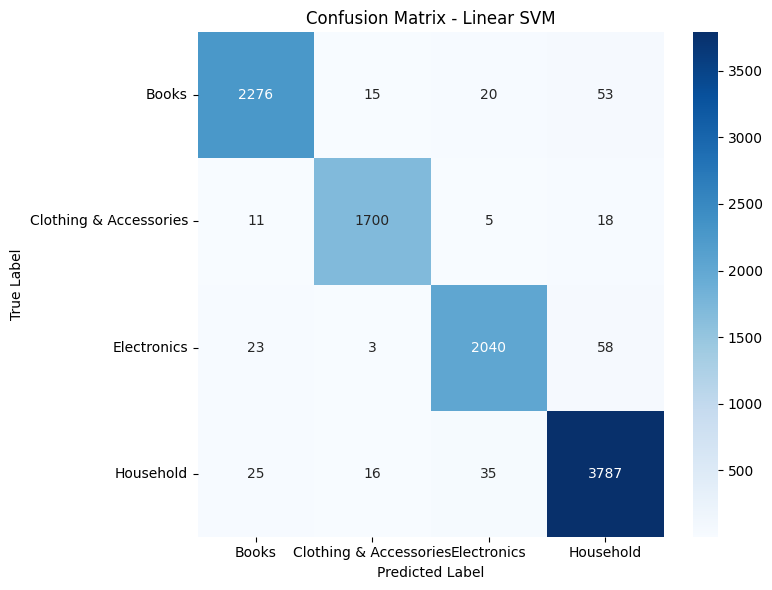


Random Forest Results:
Accuracy: 0.9710
Training time: 83.86 seconds

Classification Report:
                        precision    recall  f1-score   support

                 Books       0.97      0.96      0.97      2364
Clothing & Accessories       0.98      0.98      0.98      1734
           Electronics       0.98      0.96      0.97      2124
             Household       0.96      0.98      0.97      3863

              accuracy                           0.97     10085
             macro avg       0.97      0.97      0.97     10085
          weighted avg       0.97      0.97      0.97     10085



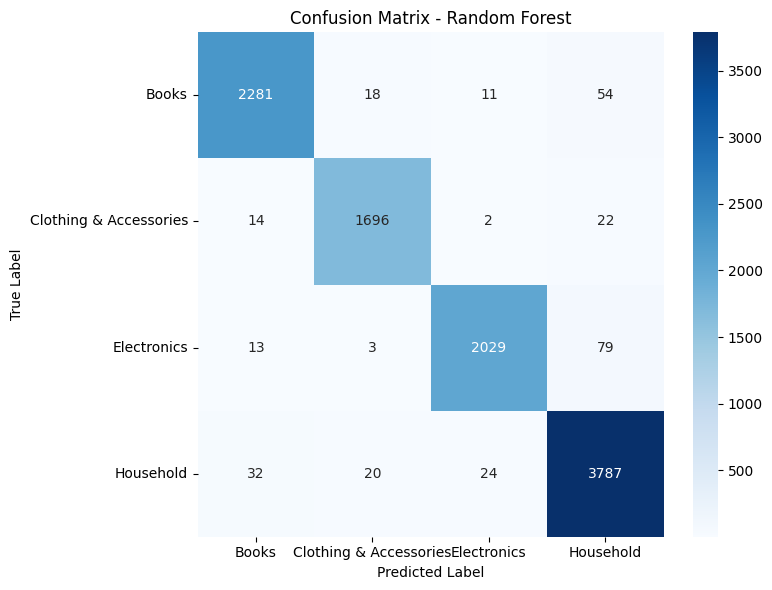

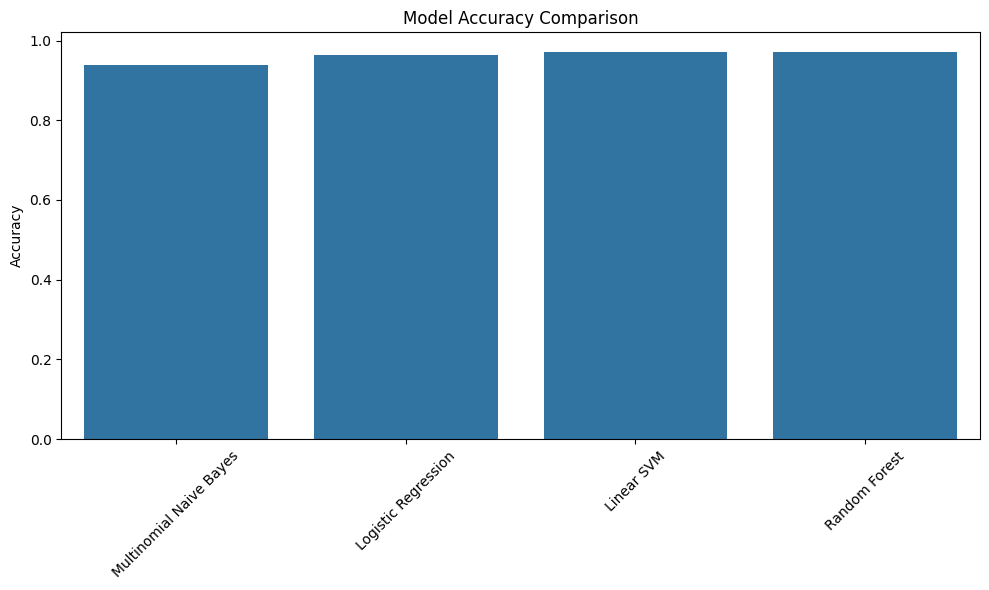


Best model: Linear SVM
Accuracy: 0.9720


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time
import matplotlib.pyplot as plt
import seaborn as sns



# Dictionary to store model results
model_results = {}

# Function to train and evaluate models
def evaluate_model(model, name):
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    end_time = time.time()

    # Store results
    model_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': report,
        'training_time': end_time - start_time
    }

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training time: {end_time - start_time:.2f} seconds")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_,
                yticklabels=model.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Train and evaluate models
models = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, C=1.0),
    'Linear SVM': LinearSVC(C=1.0, max_iter=10000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    evaluate_model(model, name)

# Compare model accuracies
plt.figure(figsize=(10, 6))
accuracies = [result['accuracy'] for result in model_results.values()]
model_names = list(model_results.keys())
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Find the best model
best_model_name = max(model_results, key=lambda x: model_results[x]['accuracy'])
print(f"\nBest model: {best_model_name}")
print(f"Accuracy: {model_results[best_model_name]['accuracy']:.4f}")

In [ ]:
# Model Building and Evaluation



In [ ]:
from sklearn.model_selection import GridSearchCV

# Setup parameters for grid search based on the best model
if best_model_name == 'Multinomial Naive Bayes':
    param_grid = {
        'alpha': [0.01, 0.1, 0.5, 1.0, 2.0]
    }
    model_to_tune = MultinomialNB()

elif best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1.0, 10.0],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }
    model_to_tune = LogisticRegression(max_iter=1000)

elif best_model_name == 'Linear SVM':
    param_grid = {
        'C': [0.1, 1.0, 10.0],
        'loss': ['hinge', 'squared_hinge']
    }
    model_to_tune = LinearSVC(max_iter=10000)

elif best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    model_to_tune = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(model_to_tune, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print results
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate the tuned model on the test set
tuned_model = grid_search.best_estimator_
y_pred_tuned = tuned_model.predict(X_test)

print("\nTuned model performance on test set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))


Best parameters: {'C': 1.0, 'loss': 'squared_hinge'}
Best cross-validation accuracy: 0.9712

Tuned model performance on test set:
Accuracy: 0.9720

Classification Report:
                        precision    recall  f1-score   support

                 Books       0.97      0.96      0.97      2364
Clothing & Accessories       0.98      0.98      0.98      1734
           Electronics       0.97      0.96      0.97      2124
             Household       0.97      0.98      0.97      3863

              accuracy                           0.97     10085
             macro avg       0.97      0.97      0.97     10085
          weighted avg       0.97      0.97      0.97     10085



In [ ]:
def predict_category(description, vectorizer, model):
    # Clean and preprocess the text
    cleaned_text = clean_text(description)
    processed_text = preprocess_text(cleaned_text)

    # Transform to feature vector
    features = vectorizer.transform([processed_text])

    # Predict category
    prediction = model.predict(features)[0]

    # Get prediction probabilities if available
    if hasattr(model, 'predict_proba'):
        probabilities = model.predict_proba(features)[0]
        prob_dict = {cls: prob for cls, prob in zip(model.classes_, probabilities)}
        return prediction, prob_dict
    else:
        return prediction, None

# Test the function with sample descriptions
sample_descriptions = [
    "Samsung Galaxy smartphone with 128GB storage and 5G connectivity",
    "Cotton T-shirt with round neck, available in multiple colors",
    "Fiction novel paperback bestseller with adventure storyline",
    "Decorative wall painting with wooden frame for living room",
    "along the electronic company is a must for the company to there employee, to buy them phones"
]

# Use the tuned model for predictions
for desc in sample_descriptions:
    category, probs = predict_category(desc, tfidf_vectorizer, tuned_model)
    print(f"\nDescription: {desc[:60]}...")
    print(f"Predicted category: {category}")

    if probs:
        print("Category probabilities:")
        for cat, prob in sorted(probs.items(), key=lambda x: x[1], reverse=True):
            print(f"  {cat}: {prob:.4f}")


Description: Samsung Galaxy smartphone with 128GB storage and 5G connecti...
Predicted category: Electronics

Description: Cotton T-shirt with round neck, available in multiple colors...
Predicted category: Clothing & Accessories

Description: Fiction novel paperback bestseller with adventure storyline...
Predicted category: Books

Description: Decorative wall painting with wooden frame for living room...
Predicted category: Household

Description: along the electronic company is a must for the company to th...
Predicted category: Clothing & Accessories


## Using Deep Learnong Approach

>E-commerce text classification task. Let's build a neural network model using TensorFlow and Keras.

## Step 1
> Setup and Data Preprocessing


In [8]:
import pandas as pd
import numpy as np
import numpy as np
import re
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
# Loading the dataset
ecommerce_data = pd.read_csv("/content/ecommerceDataset.csv", header=None)
ecommerce_data.columns = ["Category", "Description"]

In [11]:
def clean_text(text):
  if isinstance(text, str):
    text = text.lower()
    text = text.strip()
    text = text.replace('\n', ' ')
    text = re.sub('[^a-z0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

  return ""


#Apply cleaning to the description
ecommerce_data['clean_description'] = ecommerce_data["Description"].apply(clean_text)

ecommerce_data.head()

,Category,Description,clean_description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,paper plane design framed wall hanging motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",saf floral framed painting wood 30 inch x 10 i...
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,saf uv textured modern art print framed painti...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",saf flower print framed painting synthetic 13 ...
4,Household,Incredible Gifts India Wooden Happy Birthday U...,incredible gifts india wooden happy birthday u...


In [12]:
# Encode categories
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(ecommerce_data['Category'])
num_classes = len(label_encoder.classes_)
print(f"Number of classes: {num_classes}")

Number of classes: 4


In [13]:
# Print the encoding mapping
print("Category Encoding Mapping:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {y_encoded[i]}")

Category Encoding Mapping:
Books: 3
Clothing & Accessories: 3
Electronics: 3
Household: 3


In [14]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    ecommerce_data['clean_description'],
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print(f"Training set shape: {X_train.shape}")
print(f"Train sample datast: {X_train.head(2)}")
print("\n ========================================= \n")
print(f"Testing set shape: {X_test.shape}")
print(f"Test sample dataset:{X_test.head(2)}")


Training set shape: (40340,)
Train sample datast: 24147    rearming hinduism 1 review while the name of t...
18920    black decker hand tool kit 108 piece orange an...
Name: clean_description, dtype: object


Testing set shape: (10085,)
Test sample dataset:25672    sports hour pool chalk pack of 12 pcs this bil...
3088     goank mini fan multicolor multi purpose person...
Name: clean_description, dtype: object


In [15]:
# Convert to one hot encoding fr neural
y_train_one_hot = to_categorical(y_train, num_classes = num_classes)
y_test_one_hot = to_categorical(y_test, num_classes = num_classes)



# Create validation set
X_train, X_val, y_train_one_hot, y_val_one_hot = train_test_split(
    X_train,
    y_train_one_hot,
    test_size=0.15,
    random_state=42
)

print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 34289 samples
Validation set: 6051 samples
Test set: 10085 samples


In [16]:
# Tokenize the text
max_words = 20000  # Maximum number of words to consider
max_length = 200   # Maximum length of sequences

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

print(f"Vocabulary size: {len(tokenizer.word_index)}")
print(f"Input shape: {X_train_pad.shape}")

Vocabulary size: 69274
Input shape: (34289, 200)


### 1. CNN Model


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Set embedding dimension
embedding_dim = 100

# Build CNN model
def build_cnn_model():
    model = Sequential([
        # Embedding layer
        Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_length),

        # Convolutional layers
        Conv1D(128, 5, activation='relu'),
        GlobalMaxPooling1D(),

        # Dense layers
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create and train CNN model
cnn_model = build_cnn_model()
cnn_model.summary()

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Train the model
cnn_history = cnn_model.fit(
    X_train_pad,
    y_train_one_hot,
    epochs=10,
    batch_size=64,
    validation_data=(X_val_pad, y_val_one_hot),
    callbacks=[early_stopping]
)

# Evaluate on test set
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test_pad, y_test_one_hot)
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7260 - loss: 0.6769 - val_accuracy: 0.9671 - val_loss: 0.1193
Epoch 2/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9761 - loss: 0.0896 - val_accuracy: 0.9760 - val_loss: 0.1021
Epoch 3/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9928 - loss: 0.0317 - val_accuracy: 0.9762 - val_loss: 0.1085
Epoch 4/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9968 - loss: 0.0168 - val_accuracy: 0.9757 - val_loss: 0.1224
Epoch 5/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9978 - loss: 0.0123 - val_accuracy: 0.9749 - val_loss: 0.1347
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9746 - loss: 0.1081
CNN Test Accuracy: 0.9738


###  LSTM Model


In [22]:
from tensorflow.keras.layers import LSTM, Bidirectional

# Build LSTM model
def build_lstm_model():
    model = Sequential([
        # Embedding layer
        Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_length),

        # LSTM layers
        Bidirectional(LSTM(64, return_sequences=True)),
        Bidirectional(LSTM(32)),

        # Dense layers
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create and train LSTM model
lstm_model = build_lstm_model()
lstm_model.summary()

# Train the model
lstm_history = lstm_model.fit(
    X_train_pad,
    y_train_one_hot,
    epochs=10,
    batch_size=64,
    validation_data=(X_val_pad, y_val_one_hot),
    callbacks=[early_stopping]
)

# Evaluate on test set
lstm_test_loss, lstm_test_acc = lstm_model.evaluate(X_test_pad, y_test_one_hot)
print(f"LSTM Test Accuracy: {lstm_test_acc:.4f}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.7716 - loss: 0.5950 - val_accuracy: 0.9588 - val_loss: 0.1522
Epoch 2/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.9729 - loss: 0.1149 - val_accuracy: 0.9711 - val_loss: 0.1179
Epoch 3/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 34s 39ms/step - accuracy: 0.9871 - loss: 0.0618 - val_accuracy: 0.9691 - val_loss: 0.1397
Epoch 4/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 38s 33ms/step - accuracy: 0.9925 - loss: 0.0355 - val_accuracy: 0.9684 - val_loss: 0.1466
Epoch 5/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.9948 - loss: 0.0230 - val_accuracy: 0.9732 - val_loss: 0.1557
316/316 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9694 - loss: 0.1311
LSTM Test Accuracy: 0.9685


### Transformer-based Model

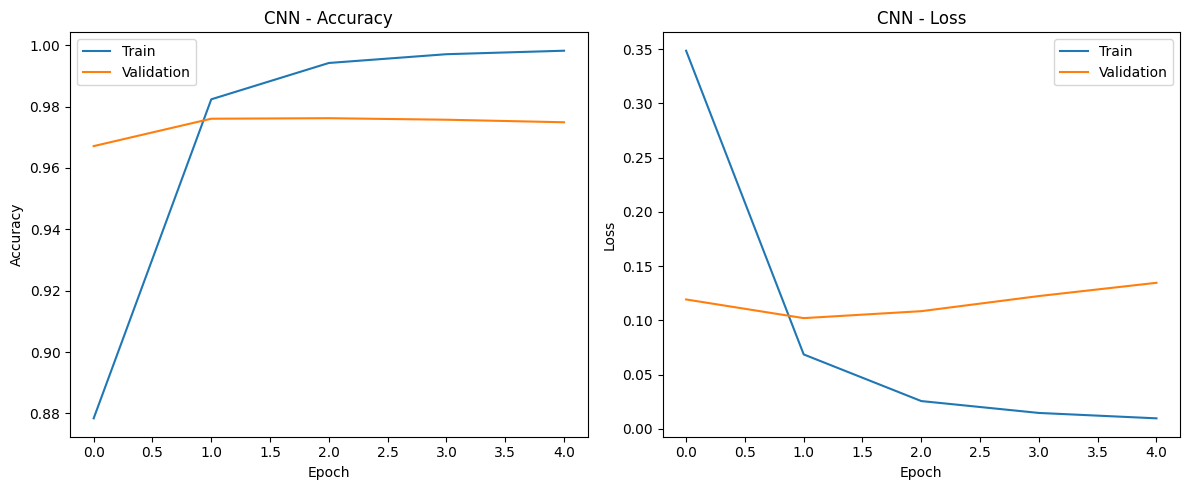

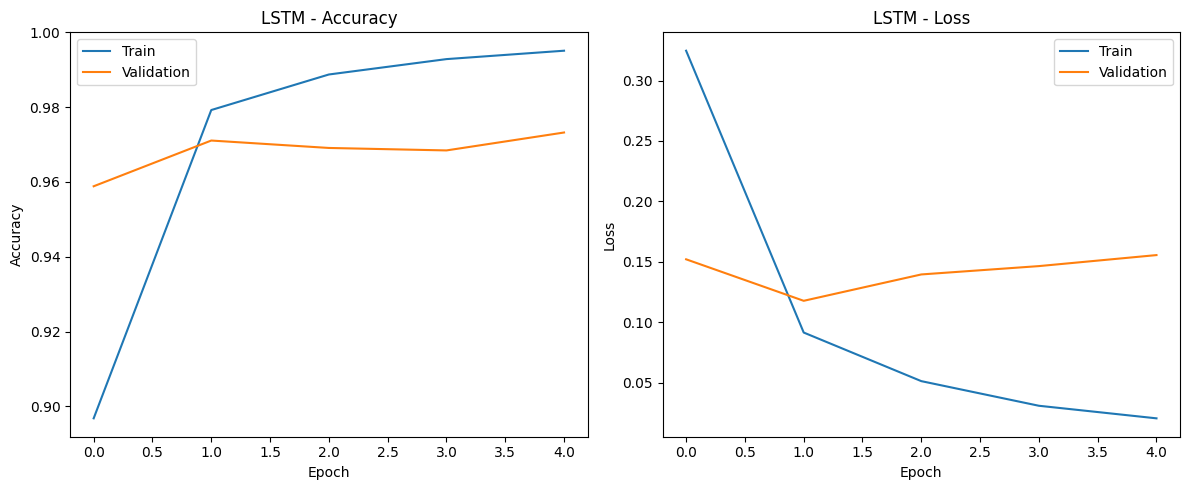

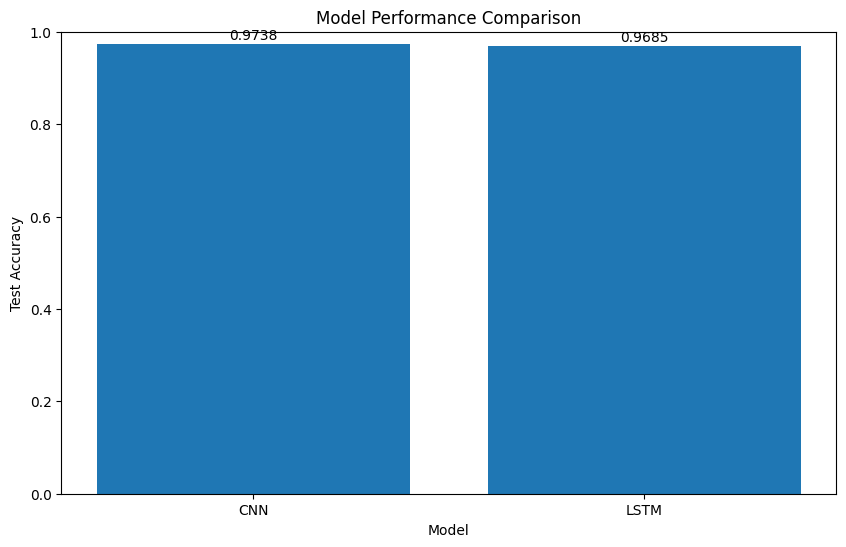

In [23]:
# Function to plot training history
def plot_history(history_dict, model_name):
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history_dict.history['accuracy'], label='Train')
    plt.plot(history_dict.history['val_accuracy'], label='Validation')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history_dict.history['loss'], label='Train')
    plt.plot(history_dict.history['val_loss'], label='Validation')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot training history for each model
plot_history(cnn_history, 'CNN')
plot_history(lstm_history, 'LSTM')

# Compare model performance
models = {
    'CNN': cnn_test_acc,
    'LSTM': lstm_test_acc
    }

plt.figure(figsize=(10, 6))
plt.bar(models.keys(), models.values())
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(models.values()):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.show()

Best model: CNN
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
                        precision    recall  f1-score   support

                 Books       0.98      0.97      0.97      2364
Clothing & Accessories       0.98      0.98      0.98      1734
           Electronics       0.96      0.98      0.97      2124
             Household       0.98      0.97      0.97      3863

              accuracy                           0.97     10085
             macro avg       0.97      0.97      0.97     10085
          weighted avg       0.97      0.97      0.97     10085



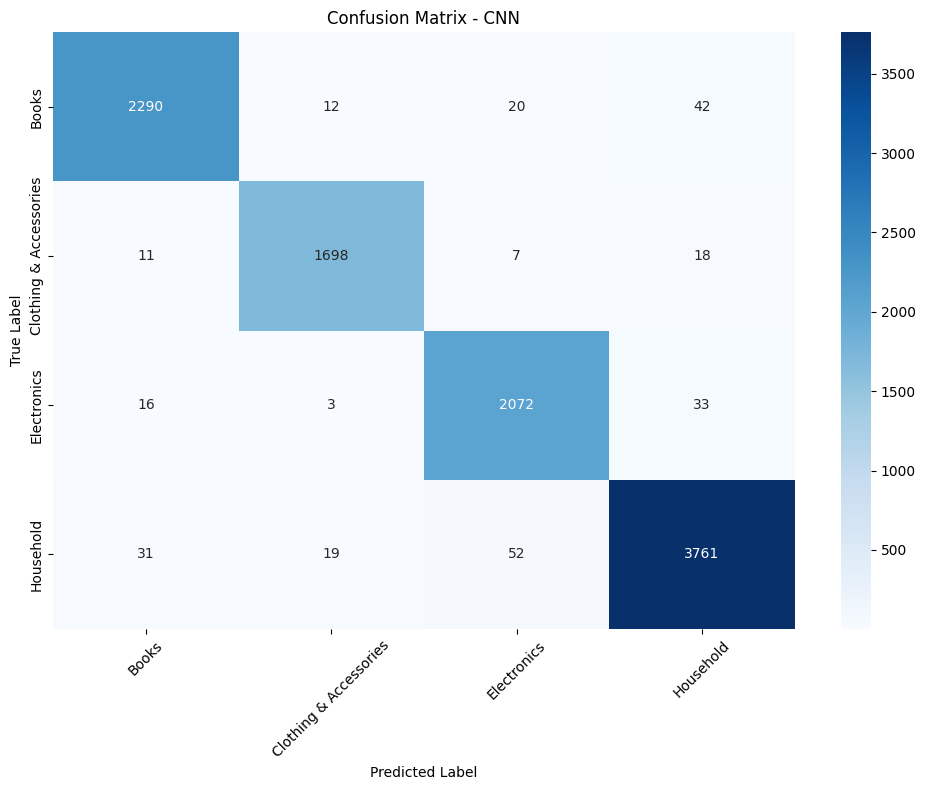

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Determine the best model
best_model_name = max(models, key=models.get)
print(f"Best model: {best_model_name}")

# Get the corresponding model
if best_model_name == 'CNN':
    best_model = cnn_model
elif best_model_name == 'LSTM':
    best_model = lstm_model

# Predict on test set
y_pred_probs = best_model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_decoded = np.argmax(y_test_one_hot, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred,
                           target_names=label_encoder.classes_))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_decoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Create a Prediction Function

In [26]:
def predict_category_dl(text, tokenizer, model, label_encoder, max_length=200):
    # Clean the text
    cleaned_text = clean_text(text)

    # Convert to sequence
    sequence = tokenizer.texts_to_sequences([cleaned_text])

    # Pad the sequence
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')

    # Make prediction
    prediction = model.predict(padded_sequence)[0]

    # Get the class index with highest probability
    predicted_class_index = np.argmax(prediction)

    # Convert to class name
    predicted_category = label_encoder.classes_[predicted_class_index]

    # Get probability
    confidence = prediction[predicted_class_index]

    # Get top 3 categories with probabilities
    top_indices = np.argsort(prediction)[-3:][::-1]
    top_categories = [(label_encoder.classes_[idx], prediction[idx]) for idx in top_indices]

    return predicted_category, confidence, top_categories

# Test with sample descriptions
sample_descriptions = [
    "Samsung Galaxy smartphone with 128GB storage and 5G connectivity",
    "Cotton T-shirt with round neck, available in multiple colors",
    "Fiction novel paperback bestseller with adventure storyline",
    "Decorative wall painting with wooden frame for living room"
]

for desc in sample_descriptions:
    category, confidence, top_categories = predict_category_dl(
        desc, tokenizer, best_model, label_encoder
    )

    print(f"\nDescription: {desc}")
    print(f"Predicted category: {category} (confidence: {confidence:.4f})")
    print("Top predictions:")
    for cat, prob in top_categories:
        print(f"  {cat}: {prob:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step

Description: Samsung Galaxy smartphone with 128GB storage and 5G connectivity
Predicted category: Electronics (confidence: 0.9996)
Top predictions:
  Electronics: 0.9996
  Books: 0.0004
  Household: 0.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

Description: Cotton T-shirt with round neck, available in multiple colors
Predicted category: Clothing & Accessories (confidence: 0.9817)
Top predictions:
  Clothing & Accessories: 0.9817
  Household: 0.0167
  Books: 0.0015
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

Description: Fiction novel paperback bestseller with adventure storyline
Predicted category: Books (confidence: 0.9991)
Top predictions:
  Books: 0.9991
  Household: 0.0005
  Electronics: 0.0003
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

Description: Decorative wall painting with wooden frame for living room
Predicted category: Household (confidence: 0.9961)
Top predictions:
  Household: 0.9961
  Books: 0.0031
  Clothing & Accessories: 0.0005


### Save the Model for Deployment

In [29]:
# Save the model
best_model.save('ecommerce_classifier_model.keras')

# Save the tokenizer
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save the label encoder
with open('label_encoder.pickle', 'wb') as handle:
    pickle.dump(label_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Model and preprocessing objects saved successfully!")

Model and preprocessing objects saved successfully!
